# Infomap ecology Project

## Project Github

[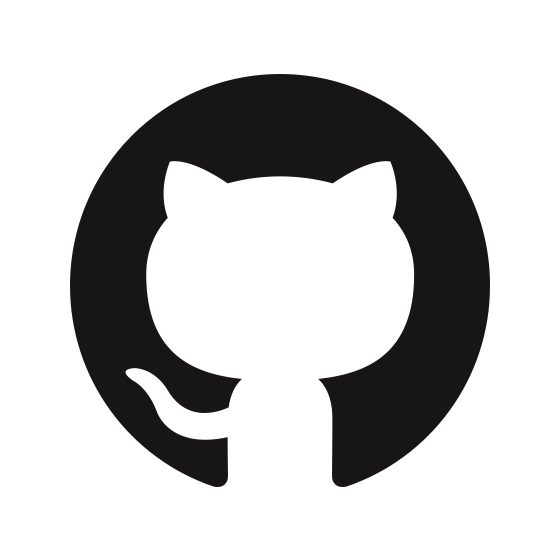](https://github.com/jjackson1994/Information_Theory)

<a id="contents"></a> 
# Contents 

   * [ 1.2:  Install Infomap Ecology and Dependinecies](#id1200)  
      * [ 1.2.1:  CRAN packages required but not explicit in docs](#id1210)  
      * [ 1.2.2:  Check the installation](#id1220)  
   * [ 1.3:  Basic Example](#id1300)  



 



<a id="id1200"></a> 

<a href ="#contents"> 
<p style="text-align: right;">return to contents</p> 
</a> 
 
## 1.2:  Install Infomap Ecology and Dependinecies


 



<a id="id1210"></a> 

<a href ="#contents"> 
<p style="text-align: right;">return to contents</p> 
</a> 
 
### 1.2.1:  CRAN packages required but not explicit in docs

In [9]:
# conda only provides up to 
install.packages('processx')
install.packages("devtools")
install.packages('stringi')

require(devtools)
library(devtools)

Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Install  (if not installed) and load necessary packages
package.list=c("attempt", "cowplot", "igraph", "ggalluvial","magrittr","metafolio","tidyverse","vegan", "devtools")
loaded <-  package.list %in% .packages()
package.list <-  package.list[!loaded]
installed <-  package.list %in% .packages(TRUE)
if (!all(installed)) install.packages(package.list[!installed], repos="http://cran.rstudio.com/")

# Install infomapecology 
devtools::install_github('Ecological-Complexity-Lab/infomap_ecology_package', force=T)
library(infomapecology)

# Check the version.
packageDescription('infomapecology')

pillar (1.8.1 -> 1.9.0) [CRAN]
hms    (1.1.2 -> 1.1.3) [CRAN]
gtable (0.3.2 -> 0.3.3) [CRAN]


Installing 3 packages: pillar, hms, gtable

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



── R CMD build ─────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmp0UNZBL/remotes3390b4202f6/Ecological-Complexity-Lab-infomap_ecology_package-244bdb2/DESCRIPTION’
─  preparing ‘infomapecology’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘infomapecology/code_from_paper’
   Removed empty directory ‘infomapecology/docs’
─  building ‘infomapecology_1.0.6.tar.gz’
   


Loading required package: attempt

Loading required package: cowplot

Loading required package: ggalluvial

Loading required package: ggplot2

Loading required package: magrittr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:attempt’:

    if_all, if_any, if_else


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: readr

Loading required package: stringr

Loading required package: tibble

Loading required package: tidyr


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


Loading required package: rlang


Attaching package: ‘rlang’


The following object is masked from ‘package:magrittr’:

    set_names


Loading required package: igraph


Attaching package: ‘igraph’


The following object is masked from ‘package:rlang’:

    is_n

Package: infomapecology
Type: Package
Title: Community Detection using Infomap, Inspired by Ecological
        Networks
Version: 1.0.6
URL:
        https://github.com/Ecological-Complexity-Lab/infomap_ecology_package
Date: 2022-04-22
Author: Shai Pilosof <pilos@post.bgu.ac.il>
Maintainer: Shai Pilosof <pilos@post.bgu.ac.il>, Geut Galai
        <geutg@post.bgu.ac.il>
BugReports:
        https://github.com/Ecological-Complexity-Lab/infomap_ecology_package/issues
Description: Collection of R functions to perform community detection
        analysis with Infomap. Also includes standardized objects to
        store and further analyze monolayer and multilayer networks.
        Inspired by ecological networks but can work for other networks
        too! Ideas/requests for features are welcome (open an issue
        here:
        https://github.com/Ecological-Complexity-Lab/infomap_ecology_package/issues).
        This work was supported by research grant ISF (Israel Science
        Foundatio


 



<a id="id1220"></a> 

<a href ="#contents"> 
<p style="text-align: right;">return to contents</p> 
</a> 
 
### 1.2.2:  Check the installation

In [3]:
#setwd('where your Infomap file and R script will live')
setwd(getwd())
install_infomap()

[1] TRUE

In [4]:
check_infomap()

[1] TRUE


 



<a id="id1300"></a> 

<a href ="#contents"> 
<p style="text-align: right;">return to contents</p> 
</a> 
 
## 1.3:  Basic Example

Visualising Bipartite Networks and Calculating Some (Ecological) Indices  
Memmott, J. (1999) The Structure of a Plant-Pollinator Food Web. Ecology Letters, 2, 276-280.  

In [25]:
install.packages('bipartite')

also installing the dependencies ‘coda’, ‘dotCall64’, ‘gridExtra’, ‘statnet.common’, ‘network’, ‘spam’, ‘viridis’, ‘maps’, ‘sna’, ‘fields’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
options(repr.plot.width=15, repr.plot.height=8)

[1] "Input: a bipartite matrix"
[1] "Creating a link list..."
running: ./Infomap infomap.txt . --tree --seed 123 -N 20 -f undirected --silent --two-level


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


[1] "Removing auxilary files..."


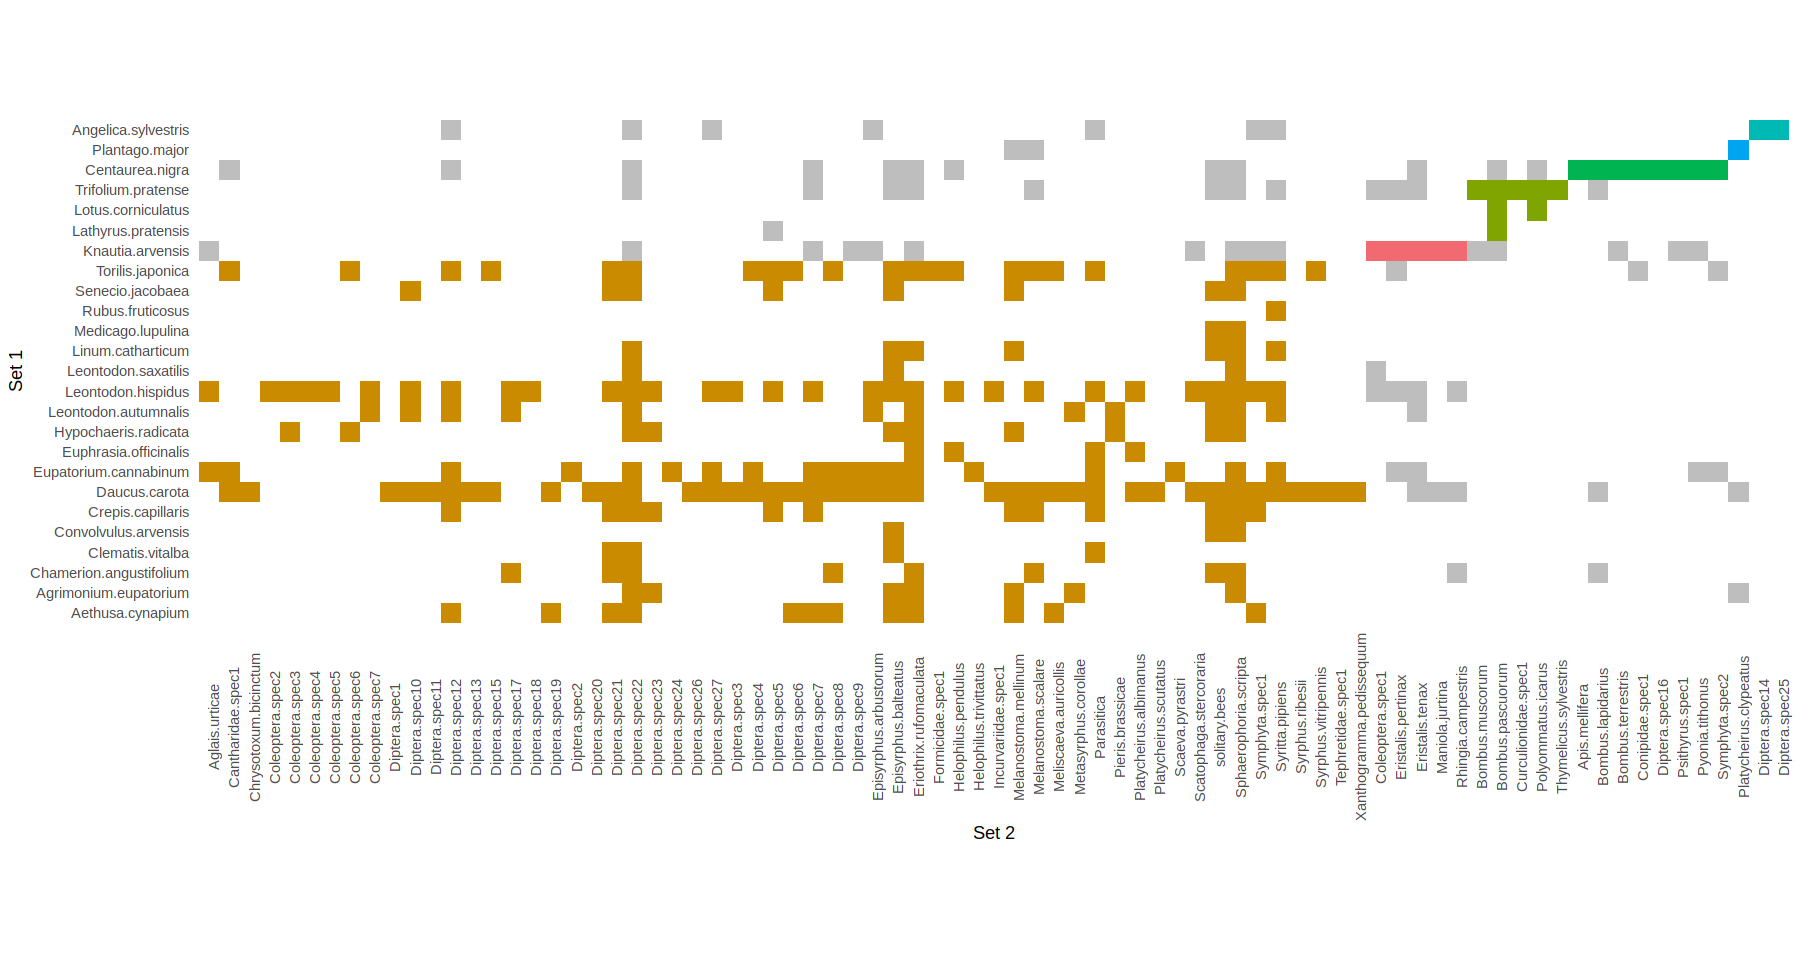

In [9]:
# Import data
library(bipartite)
data(memmott1999)

network_object <- create_monolayer_object(memmott1999, bipartite = T, directed = F, group_names = c('A','P'))
infomap_object <- run_infomap_monolayer(network_object, infomap_executable='Infomap',
flow_model = 'undirected',
silent=T, trials=20, two_level=T, seed=123)

# Plot the matrix (plotting function in beta)
plot_modular_matrix(infomap_object)